In [153]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline
import os.path as pt
import pandas as pd 
import tensorflow.keras.backend as K
from sklearn.metrics import fbeta_score

In [154]:
train_labels = pd . read_csv ("../../data/CONLL2003/multiclass-eng.train.true_labels.csv",header=None)
data_train = pd .read_csv ( "../../data/CONLL2003/eng.train.representation.csv",header=None)

In [155]:
train_labels.head(10)

,0,1,2,3,4
0,1,0,0,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
5,1,0,0,0,0
6,1,0,0,0,0
7,1,0,0,0,0
8,1,0,0,0,0
9,1,0,0,0,0


In [156]:
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.451033,-0.488318,-0.255821,-0.137809,-0.048144,-0.043957,0.451039,0.102954,0.089547,0.076664,...,-0.218669,0.682409,-0.473345,-0.009874,-0.384008,0.140692,-0.012692,0.165181,0.058889,-0.390648
1,-0.239333,0.775531,-0.174063,0.158301,0.297638,-0.129337,-0.097236,0.108740,0.044130,0.123633,...,-0.284584,-0.256766,-0.431447,-0.649766,0.353310,-0.230163,0.944858,0.927042,-0.460076,0.182715
2,0.352255,-0.454496,-0.261688,0.499608,0.449225,0.034397,0.131889,0.089818,-0.471335,0.164576,...,-0.076328,-0.044453,-0.238135,-0.054626,-0.462026,-0.789696,-0.154895,1.240298,0.455828,0.015615
3,0.087985,-0.015801,0.396414,-0.428971,0.338345,0.275210,0.275715,0.667979,-0.576721,0.375074,...,0.185164,0.584429,0.045648,-0.084590,-0.800641,0.129176,-0.069257,0.174006,-0.166303,0.274083
4,-0.219841,-0.365603,-0.060525,-0.088899,0.053416,0.027642,-0.257103,0.180212,0.053477,-0.075219,...,-0.260747,0.155433,-0.227329,0.002219,0.180378,0.393444,0.015168,0.191013,-0.225727,0.188366


In [157]:
data_train.shape

(5000, 768)

In [158]:
##Scale the data

scaler=StandardScaler()
data_train = scaler.fit_transform (data_train)

In [159]:
## build model 

# input
in_=keras.Input(shape=data_train.shape[1])

##Couche cachée
lay=layers.Dense(units=4)(in_)

#couche cachée
lay=layers.Dense(units=8)(lay)

#couche de sortie
sortie=layers.Dense(units=5,activation='softmax')(lay)

model=keras.models.Model(in_,sortie)

## The model plot

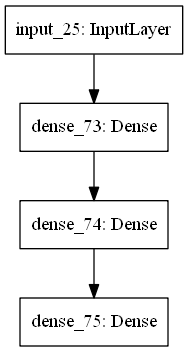

In [160]:
plot_model(model)

## Model summary

In [161]:
model.summary()

Model: "model_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        [(None, 768)]             0         
_________________________________________________________________
dense_73 (Dense)             (None, 4)                 3076      
_________________________________________________________________
dense_74 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_75 (Dense)             (None, 5)                 45        
Total params: 3,161
Trainable params: 3,161
Non-trainable params: 0
_________________________________________________________________


In [162]:
## compiler le modèle 

metrics=['categorical_accuracy',tf.keras.metrics.AUC(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()
        ]
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=metrics)

In [163]:
# entrainer le modèle

history=model.fit(data_train,train_labels,epochs=10,batch_size=12,verbose=2)

Train on 5000 samples
Epoch 1/10
5000/5000 - 1s - loss: 0.9098 - categorical_accuracy: 0.7280 - auc_24: 0.9039 - precision_24: 0.9352 - recall_24: 0.4822
Epoch 2/10
5000/5000 - 1s - loss: 0.2486 - categorical_accuracy: 0.9324 - auc_24: 0.9931 - precision_24: 0.9777 - recall_24: 0.8924
Epoch 3/10
5000/5000 - 1s - loss: 0.1530 - categorical_accuracy: 0.9520 - auc_24: 0.9967 - precision_24: 0.9759 - recall_24: 0.9320
Epoch 4/10
5000/5000 - 1s - loss: 0.1200 - categorical_accuracy: 0.9640 - auc_24: 0.9980 - precision_24: 0.9789 - recall_24: 0.9484
Epoch 5/10
5000/5000 - 1s - loss: 0.0956 - categorical_accuracy: 0.9696 - auc_24: 0.9987 - precision_24: 0.9814 - recall_24: 0.9602
Epoch 6/10
5000/5000 - 1s - loss: 0.0757 - categorical_accuracy: 0.9792 - auc_24: 0.9990 - precision_24: 0.9866 - recall_24: 0.9714
Epoch 7/10
5000/5000 - 1s - loss: 0.0653 - categorical_accuracy: 0.9828 - auc_24: 0.9989 - precision_24: 0.9885 - recall_24: 0.9776
Epoch 8/10
5000/5000 - 1s - loss: 0.0533 - categorical

Text(0.5, 0, 'epoch')

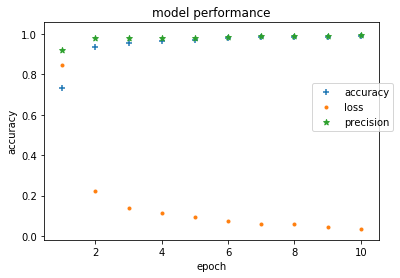

In [106]:
plt.scatter(range (1,11),history.history['categorical_accuracy'],label="accuracy",marker ='+')
plt.scatter(range (1,11),history.history['loss'],label ="loss",marker ='.')
plt.scatter(range (1,11),history.history['precision'],label ="precision",marker ='*')
plt.title('model performance')
plt.legend(loc=[0.8,0.5])
plt.ylabel('accuracy')
plt.xlabel('epoch')

## Test evaluation 

In [164]:
def f_beta_score (precision , recall , beta):
    return (1+beta**2) * precision* recall /(recall+(beta**2)*precision)

In [165]:
def print_metrics (metrics):
    precision = metrics [3]
    recall = metrics[4]
    accuracy=metrics[1]
    area_under_ROC=metrics[2]
    loss = metrics [0]
    f_score= f_beta_score(precision,recall,beta=2)
    f1_score=f_beta_score(precision,recall,beta=1)
    f5_score=f_beta_score(precision,recall,beta=5)
    
    print ('precision is ',precision)
    print ('recall is',recall)
    print ('accuracy is',accuracy)
    print ('loss is',loss)
    print ('area under ROC is',area_under_ROC)
    print ('f1_score is ', f1_score)
    print ('f2_score is ', f_score)
    print ('f5_score is ', f5_score)

### TEST A 

In [166]:
test_labels = pd . read_csv ("../../data/CONLL2003/multiclass-eng.testa.true_labels.csv",header=None)
data_test = pd .read_csv ( "../../data/CONLL2003/eng.testa.representation.csv",header=None)
scaler1 = StandardScaler()
data_test=scaler1.fit_transform (data_test)

In [167]:
preds = model.predict (data_test)
## we will say that the prediction is labeled one when its probability exceeds the threshold = 0.5
preds= (preds>0.5)

In [168]:
metrics = model.evaluate (data_test,test_labels )
print_metrics(metrics)

5000/5000 [==============================] - 1s 139us/sample - loss: 0.2159 - categorical_accuracy: 0.9496 - auc_24: 0.9921 - precision_24: 0.9554 - recall_24: 0.9468
precision is  0.95539856
recall is 0.9468
accuracy is 0.9496
loss is 0.21587289798823187
area under ROC is 0.99209785
f1_score is  0.9510798423626492
f2_score is  0.9485073024936029
f5_score is  0.947127844661274


In [169]:
## Confusion matrix 
from sklearn.metrics import confusion_matrix

# print confusion matrix 

preds= np.argmax(preds,axis=1)
y_for_confusion= np.argmax(np.array(test_labels),axis=1)
cm = confusion_matrix(y_for_confusion,preds)
print ('the confusion matrix is \n ',cm)

the confusion matrix is 
  [[4121    9   11    5   11]
 [   6  287    1   23    8]
 [  25    2   68   10   10]
 [  20    4   10  159   13]
 [  31    9   19   25  113]]


### TEST B

In [170]:
test_labels_2 = pd . read_csv ("../../data/CONLL2003/multiclass-eng.testb.true_labels.csv",header=None)
data_test_2 = pd .read_csv ( "../../data/CONLL2003/eng.testb.representation.csv",header=None)
scaler2 = StandardScaler()
data_test_2=scaler2.fit_transform (data_test_2)

In [171]:
preds = model.predict (data_test_2)
## we will say that the prediction is labeled one when its probability exceeds the threshold = 0.5
preds= (preds>0.5)

In [172]:
metrics = model.evaluate (data_test_2,test_labels_2 )
print_metrics(metrics)

5000/5000 [==============================] - 0s 63us/sample - loss: 0.2316 - categorical_accuracy: 0.9470 - auc_24: 0.9895 - precision_24: 0.9535 - recall_24: 0.9422
precision is  0.95345074
recall is 0.9422
accuracy is 0.947
loss is 0.2316112266952172
area under ROC is 0.98953724
f1_score is  0.9477919855250129
f2_score is  0.9444288602560463
f5_score is  0.94262781365557


In [173]:
## Confusion matrix 
# print confusion matrix 

preds= np.argmax(preds,axis=1)
y_for_confusion= np.argmax(np.array(test_labels),axis=1)
cm = confusion_matrix(y_for_confusion,preds)
print ('the confusion matrix is \n ',cm)

the confusion matrix is 
  [[3467  259  102  167  162]
 [ 276   18    2   12   17]
 [  93   10    2    5    5]
 [ 169   18    6    5    8]
 [ 167   13    4    4    9]]


## Train the same classifier after balancing the two classes of the input data with adding weights to each class when training ( the same method in the biclassification file: Easy-keras )

In [174]:
## build model 

# input
in_=keras.Input(shape=data_train.shape[1])

##Couche cachée
lay=layers.Dense(units=6)(in_)


#couche cachée
lay=layers.Dense(units=12)(lay)

#couche de sortie
sortie=layers.Dense(units=5,activation='softmax')(lay)

classifier=keras.models.Model(in_,sortie)

In [175]:
metrics=['categorical_accuracy',tf.keras.metrics.AUC(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()
        ]
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=metrics)

In [176]:
# Calculate weights 
from sklearn.utils import class_weight
weight = class_weight.compute_class_weight('balanced', np.unique(np.argmax(np.array(train_labels),axis=1)),np.argmax(np.array(train_labels),axis=1))

# fit the model
history_classifier=classifier.fit(data_train,train_labels,epochs=12,batch_size=12,verbose=2)

C:\Users\abder\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass classes=[0 1 2 3 4], y=[0 0 1 ... 0 1 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


Train on 5000 samples
Epoch 1/12
5000/5000 - 1s - loss: 0.8679 - categorical_accuracy: 0.6854 - auc_25: 0.9069 - precision_25: 0.8288 - recall_25: 0.5394
Epoch 2/12
5000/5000 - 1s - loss: 0.1927 - categorical_accuracy: 0.9460 - auc_25: 0.9954 - precision_25: 0.9756 - recall_25: 0.9198
Epoch 3/12
5000/5000 - 1s - loss: 0.1177 - categorical_accuracy: 0.9630 - auc_25: 0.9982 - precision_25: 0.9791 - recall_25: 0.9534
Epoch 4/12
5000/5000 - 1s - loss: 0.0894 - categorical_accuracy: 0.9754 - auc_25: 0.9982 - precision_25: 0.9826 - recall_25: 0.9698
Epoch 5/12
5000/5000 - 1s - loss: 0.0699 - categorical_accuracy: 0.9790 - auc_25: 0.9990 - precision_25: 0.9844 - recall_25: 0.9748
Epoch 6/12
5000/5000 - 1s - loss: 0.0542 - categorical_accuracy: 0.9830 - auc_25: 0.9994 - precision_25: 0.9867 - recall_25: 0.9814
Epoch 7/12
5000/5000 - 1s - loss: 0.0429 - categorical_accuracy: 0.9878 - auc_25: 0.9997 - precision_25: 0.9899 - recall_25: 0.9848
Epoch 8/12
5000/5000 - 1s - loss: 0.0401 - categorical

## Test A 

In [177]:
preds_a =  classifier.predict (data_test)
## we will say that the prediction is labeled one when its probability exceeds the threshold = 0.5
preds_a= (preds_a>0.5)
metrics = classifier.evaluate (data_test,test_labels )
print_metrics(metrics)

5000/5000 [==============================] - 1s 150us/sample - loss: 0.2181 - categorical_accuracy: 0.9570 - auc_25: 0.9910 - precision_25: 0.9606 - recall_25: 0.9548
precision is  0.96056336
recall is 0.9548
accuracy is 0.957
loss is 0.21809670010013507
area under ROC is 0.99100316
f1_score is  0.9576730146877467
f2_score is  0.9559471406729202
f5_score is  0.9550203979697184


In [178]:
preds_b =  classifier.predict (data_test)
## we will say that the prediction is labeled one when its probability exceeds the threshold = 0.5
preds_a= (preds_a>0.5)
metrics = classifier.evaluate (data_test_2,test_labels_2 )
print_metrics(metrics)

5000/5000 [==============================] - 0s 62us/sample - loss: 0.2450 - categorical_accuracy: 0.9500 - auc_25: 0.9894 - precision_25: 0.9524 - recall_25: 0.9476
precision is  0.9523618
recall is 0.9476
accuracy is 0.95
loss is 0.24504836603030564
area under ROC is 0.9894135
f1_score is  0.949974947398449
f2_score is  0.948548556801311
f5_score is  0.9477822731070875


# Conclusion

######  The multiclassification has great results (F-score > 0.94) and It is better than biclassification.
###### Explanation : with multiclassification, the input dataset is less imbalanced than in the case of biclassification because we have more minority classes